<a href="https://colab.research.google.com/github/gabrielbarata/telegram-sorteio/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# v0

In [ ]:
import os
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
from urllib.request import urlopen
import requests
from lxml import html, etree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
import dill
import numpy as np
from numpy import log as ln
from math import log10,pi,log,e
from matplotlib import pyplot as plt

In [ ]:
DATA_FILES_PATH='/content/files/'
TMP_FILES_PATH='/content/tmp/'
[ os.system(f'mkdir {i}') for i in [DATA_FILES_PATH,TMP_FILES_PATH] ]
!rm -rf /content/sample_data/

In [ ]:
!rm -rf {DATA_FILES_PATH}*
for file_ in ['PS_2021.12.09_21.35.53.txt','omega_centauri.txt','pleiades.txt']:
  os.system(f'wget "https://raw.githubusercontent.com/gabrielbarata/TCC/main/files/{file_}" -P {DATA_FILES_PATH}')

In [ ]:
TMP_TESS_PATH = f'{TMP_FILES_PATH}tess_temp.csv'
def make_tess_temp_csv():
  with open(f'{DATA_FILES_PATH}PS_2021.12.09_21.35.53.txt') as read_file:
    lines = read_file.read().split('\n')
    lines = [i for i in lines[:-1] if i[0]!='#']
    text="\n".join(lines)
    with open(TMP_TESS_PATH,'w') as write_file:
      write_file.write(text)
make_tess_temp_csv()

In [ ]:
tess_df_original=pd.read_csv(TMP_TESS_PATH)
tess_df_original

,loc_rowid,pl_name,hostname,default_flag,disc_facility,st_spectype,st_lum,sy_bmag,sy_vmag
0,1,11 Com b,11 Com,1,Xinglong Station,G8 III,2.243,5.726,4.72307
1,2,11 Com b,11 Com,0,Xinglong Station,NaN,NaN,5.726,4.72307
2,3,11 UMi b,11 UMi,0,Thueringer Landessternwarte Tautenburg,NaN,NaN,6.382,5.01300
3,4,11 UMi b,11 UMi,1,Thueringer Landessternwarte Tautenburg,NaN,NaN,6.382,5.01300
4,5,11 UMi b,11 UMi,0,Thueringer Landessternwarte Tautenburg,K4 III,NaN,6.382,5.01300
...,...,...,...,...,...,...,...,...,...
29607,29608,ups And d,ups And,1,Multiple Observatories,F8 V,NaN,4.625,4.09565
29608,29609,ups And d,ups And,0,Multiple Observatories,NaN,NaN,4.625,4.09565
29609,29610,ups And d,ups And,0,Multiple Observatories,F8 V,NaN,4.625,4.09565
29610,29611,xi Aql b,xi Aql,0,Okayama Astrophysical Observatory,NaN,NaN,5.761,4.70964


In [ ]:
def get_column_unique_list(df, column):
  return list(df.groupby(column).groups.keys())

In [ ]:
len(get_column_unique_list(tess_df_original, 'disc_facility'))

63

In [ ]:
tess_df = pd.read_csv(TMP_TESS_PATH)
tess_df = tess_df[tess_df['default_flag']==1]

print('quantidade de planetas:',len(get_column_unique_list(tess_df, 'pl_name')))
print('quantidade de estrelas:',len(get_column_unique_list(tess_df, 'hostname')))

tess_df = tess_df[['st_lum','sy_bmag','sy_vmag','st_spectype']]
tess_df.columns = ['lum','b','v','type']
tess_df = tess_df.dropna()
tess_df

quantidade de planetas: 4576
quantidade de estrelas: 3393


,lum,b,v,type
0,2.243,5.726,4.72307,G8 III
6,1.763,6.256,5.23133,K0 III
20,2.254,6.615,5.22606,K3 III
21,1.602,6.430,5.51048,G6 III
24,-0.370,14.168,12.61800,K7 V
...,...,...,...,...
29567,2.039,4.314,3.31216,K0 III
29568,1.850,6.237,5.21644,G8 III
29573,0.160,6.252,5.65000,G0 V
29577,0.232,6.001,5.40816,G0 V


In [ ]:
np.array(get_column_unique_list(tess_df, 'type'))

array(['A', 'A2 V', 'A5 V', 'A7 V', 'A8', 'A8 V', 'Am C', 'B', 'B9 IV',
       'B9 Vne', 'B9.5-A0', 'Be9.5/AO', 'F', 'F V', 'F0 IV', 'F2', 'F4 V',
       'F5 V', 'F6 V', 'F7 V', 'F8', 'F8 IV/V', 'F8 V', 'F9 IV/V', 'F9 V',
       'G', 'G V', 'G0', 'G0 IV', 'G0 V', 'G0 VI', 'G1 IV/V', 'G1 V',
       'G1.5 V', 'G2', 'G2 IV-V', 'G2 V', 'G2/G3 V', 'G3', 'G3 III',
       'G3 IV', 'G3 V', 'G3/G5 V', 'G4 V', 'G5', 'G5 III', 'G5 IV',
       'G5 IV/V', 'G5 V', 'G6 III', 'G6 V', 'G7', 'G7 III', 'G7 V', 'G8',
       'G8 III', 'G8 IV', 'G8 V', 'G8/K0', 'G9 III', 'G9 IV', 'G9 V',
       'G9/K0', 'K', 'K V', 'K0', 'K0 III', 'K0 III-IV', 'K0 IV',
       'K0 IV-V', 'K0 V', 'K0.5 V', 'K1', 'K1 III', 'K1 IV', 'K1 V', 'K2',
       'K2 II', 'K2 III', 'K2 III/IV', 'K2 V', 'K2.5 V', 'K3', 'K3 III',
       'K3 IV', 'K3 V', 'K3.5 V', 'K4', 'K4 III', 'K4 V', 'K4.5', 'K5',
       'K5 III', 'K5 V', 'K5.5', 'K6 V', 'K7', 'K7 V', 'K7/M0 V', 'K8 V',
       'M', 'M V', 'M(3.5+/-0.5) V', 'M0', 'M0 V', 'M0.0 V', 'M0.5'

In [ ]:
def get_spectral_type_and_color_index(line):
  spectral_type=line['type'].split(" ")
  spectral_type = spectral_type[1] if len(spectral_type)>1 else float('NaN')
  color_index = line['b']-line['v']
  return spectral_type, color_index
tess_df[['sptype','b-v']]=tess_df.apply(get_spectral_type_and_color_index,axis=1,result_type="expand")
tess_df

,lum,b,v,type,sptype,b-v
0,2.243,5.726,4.72307,G8 III,III,1.00293
6,1.763,6.256,5.23133,K0 III,III,1.02467
20,2.254,6.615,5.22606,K3 III,III,1.38894
21,1.602,6.430,5.51048,G6 III,III,0.91952
24,-0.370,14.168,12.61800,K7 V,V,1.55000
...,...,...,...,...,...,...
29567,2.039,4.314,3.31216,K0 III,III,1.00184
29568,1.850,6.237,5.21644,G8 III,III,1.02056
29573,0.160,6.252,5.65000,G0 V,V,0.60200
29577,0.232,6.001,5.40816,G0 V,V,0.59284


In [ ]:
def get_sample(dict_,index=0):
  key = list(dict_.keys())[index]
  print(f'key = "{key}"')
  return dict_[key]

In [ ]:
def get_sptypes():
  sptype_group = tess_df.groupby(['sptype'])
  sptype_list = sptype_group.groups.keys()
  return {i:sptype_group.get_group(i) for i in sptype_list}
sptypes = get_sptypes()
get_sample(sptypes)

key = "C"


,lum,b,v,type,sptype,b-v
28582,1.068,8.306,8.03,Am C,C,0.276


In [ ]:
def get_percentage(part, whole):
  return f'{part/whole:.2%}'
{name:get_percentage(len(df),len(tess_df)) for name, df in sptypes.items()}

{'C': '0.22%',
 'II': '0.22%',
 'III': '9.71%',
 'III-IV': '0.44%',
 'III/IV': '0.22%',
 'IV': '3.97%',
 'IV-V': '0.66%',
 'IV/V': '0.88%',
 'V': '53.42%',
 'VI': '0.22%',
 'Vne': '0.22%'}

In [ ]:
sptypes_percentage_sum = np.sum([len(i) for i in sptypes.values()])
get_percentage(sptypes_percentage_sum, len(tess_df)) 

'70.20%'

In [ ]:
def get_temperature(color_index):
  a=0.92*color_index
  return 4600 * (  1/(a + 1.7)  +  1/(a + 0.62)  )

def radius_to_luminosity(radius,temperature,is_log=False):
  sun_radius = 696340*10**3
  Stefan_Boltzmann = 5.67*10**-8
  sun_luminosity = 3.827*10**26
  radius *= sun_radius
  luminosity = 4*pi*(radius**2)*Stefan_Boltzmann*(temperature**4)
  luminosity /= sun_luminosity
  return log10(luminosity) if is_log else luminosity
radius_to_luminosity(1,1,True)

-15.04442285299303

In [ ]:
def set_temperature(line):
  return get_temperature(line['b-v'])
for name, df in sptypes.items():
  sptypes[name]['T']=df.apply(set_temperature,axis=1,result_type="expand")
get_sample(sptypes)

key = "C"


,lum,b,v,type,sptype,b-v,T
28582,1.068,8.306,8.03,Am C,C,0.276,7617.881422


In [ ]:
fig = go.Figure()
fig.update_yaxes(type="log")
fig.update_xaxes(type="log")
for exp in range(10,100,10):
  data = [[i,i**exp] for i in np.arange(-0.2,20, 0.1)]
  df=pd.DataFrame(data=data,columns=['x','y'])
  trace= go.Scatter(
        x=df['x'],
        y=df['y'],
    )
  fig.add_trace(trace)
fig.show()

In [ ]:
def get_radius_df(radius,start,end,is_log=False):
  data = [ [temperature , radius_to_luminosity(radius,temperature,is_log)] for temperature in np.linspace(start,end,10)]
  return pd.DataFrame(data=data,columns=['T','lum'])
get_radius_df(1,2,6)

,T,lum
0,2.000000,1.444432e-14
1,2.444444,3.223279e-14
2,2.888889,6.287826e-14
3,3.333333,1.114531e-13
4,3.777778,1.838750e-13
5,4.222222,2.869072e-13
6,4.666667,4.281582e-13
7,5.111111,6.160819e-13
8,5.555556,8.599776e-13
9,6.000000,1.169990e-12


In [ ]:
def make_radius_line(radius,start,end,is_log=False):
  radius_df = get_radius_df(radius,start,end,is_log)
  trace = go.Scatter(
        x=radius_df['T'],
        y=radius_df['lum'],
        mode='lines',
        name='R = '+str(radius),
        line=dict(color='crimson', width=0.5),
        showlegend=False,
    )
  fig.add_trace(trace)
  y = radius_df['lum'][0] if is_log else log10(radius_df['lum'][0])
  fig.add_annotation(x=log10(radius_df['T'][0]), y=y,
            text=f'R = {radius}',
            showarrow=True,
            )


In [ ]:
fig = go.Figure()

for name,df in sptypes.items():
  trace = go.Scatter(
        x=df['T'],
        y=df['lum'],
        mode='markers',
        name=name,
        marker=dict(size=5),
    )
  fig.add_trace(trace)

start=2.5*10**3
end=9*10**3
[make_radius_line(10**i,start,end,is_log=True) for i in range(-1,3)]


fig.update_layout(
    width = 400,
    height = 600,
    xaxis_title_text='temperatura',
    yaxis_title_text='log luminosidade',
)
fig.update_xaxes(
    range=[log10(end),log10(start)],
    type="log"
    )
fig.update_yaxes(range=[-3.5, 3.5])

fig.show()

In [ ]:
def get_cluster_df(file_name):
  with open(f'{DATA_FILES_PATH}{file_name}.txt') as file_read:
    lines=file_read.read().split('\n')
    header=lines[7]
    content=lines[10:]
    lines=[header]+content
    text="\n".join(lines)
    with open(f'{file_name}_temp.csv','w') as file_write:
      file_write.write(text)
  return pd.read_csv(f'{file_name}_temp.csv',sep='|')

OMEGA_CENTAURI='Omega Centauri'
PLEIADES='Plêiades'

clusters_original={
    OMEGA_CENTAURI: get_cluster_df('omega_centauri'),
    PLEIADES: get_cluster_df('pleiades')
}

In [ ]:
clusters_constats={
    OMEGA_CENTAURI:{
        'parsec': 0.193
    },
    PLEIADES:{
        'parsec': 7.364
    }
}

In [ ]:
def make_clusters_accurate():
  new_clusters={}
  for name, df in clusters_original.items():
    identifier_group=df.groupby('            identifier             ')
    identifier_list=list(identifier_group.groups.keys())
    df_cleaned_list=[i for i in identifier_list if all(identifier_group.get_group(i)['prob. ']=='   100')]
    df_clean=pd.DataFrame(columns=df.columns)
    for i in df_cleaned_list:
      df_clean=df_clean.append(identifier_group.get_group(i))
    df_clean=df_clean.sort_index()
    new_clusters[name]=df_clean
  return new_clusters
clusters_accurate = make_clusters_accurate()
get_sample(clusters_accurate)

key = "Omega Centauri"


,#,dist(asec),prob.,link ref,link,identifier,typ,"coord1 (ICRS,J2000/2000)",Mag U,Mag B,Mag V,Mag R,Mag I,spec. type,#bib,#not
7,8,258.14,100,2000A&A...360..472V,B,2MASS J13271206-4729449,RG*,13 27 12.0772834640 -47 29 44.918288466,14.89,13.140,11.645,~,~,~,23.0,0.0
8,9,258.14,100,2001A&A...373..159C,B,2MASS J13271206-4729449,RG*,13 27 12.0772834640 -47 29 44.918288466,14.89,13.140,11.645,~,~,~,23.0,0.0
9,10,258.14,100,2007MNRAS.382.1353V,S,2MASS J13271206-4729449,RG*,13 27 12.0772834640 -47 29 44.918288466,14.89,13.140,11.645,~,~,~,23.0,0.0
10,11,258.14,100,2010ApJ...722.1373J,B,2MASS J13271206-4729449,RG*,13 27 12.0772834640 -47 29 44.918288466,14.89,13.140,11.645,~,~,~,23.0,0.0
13,14,691.36,100,2007MNRAS.382.1353V,S,2MASS J13274060-4735578,RG*,13 27 40.604 -47 35 57.85,14.17,13.330,12.173,~,~,~,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,7680,383.32,100,2018A&A...618A..15L,B,[MDL2011] 67585,HB*,13 26 10.361 -47 30 09.22,17.028,18.460,18.643,~,18.780,~,1.0,0.0
7680,7681,352.60,100,2018A&A...618A..15L,B,[MDL2011] 71204,HB*,13 26 12.712 -47 28 07.48,17.134,18.619,18.756,~,18.888,~,1.0,0.0
7681,7682,423.98,100,2018A&A...618A..15L,B,[MDL2011] 60969,HB*,13 26 05.982 -47 27 39.68,17.049,18.472,18.649,~,18.810,~,1.0,0.0
7682,7683,364.25,100,2018A&A...618A..15L,B,[MDL2011] 78393,HB*,13 26 17.385 -47 32 08.41,17.781,18.964,18.894,~,18.524,~,1.0,0.0


In [ ]:
tmp_df=get_sample(clusters_accurate)
tmp_df[tmp_df['prob. ']!='   100']

key = "Omega Centauri"


,#,dist(asec),prob.,link ref,link,identifier,typ,"coord1 (ICRS,J2000/2000)",Mag U,Mag B,Mag V,Mag R,Mag I,spec. type,#bib,#not


In [ ]:
def make_custers_copy(cluster_dict):
  new_cluster_dict={}
  for name, df in cluster_dict.items():
    new_cluster_dict[name]=df.copy()
  return new_cluster_dict

def custers_dropna(cluster_dict):
  new_cluster_dict={}
  for name, df in cluster_dict.items():
    new_cluster_dict[name]=df.dropna()
  return new_cluster_dict

In [ ]:
clusters=make_custers_copy(clusters_accurate)
for name, df in clusters.items():
  df=df[['dist(asec)','Mag B ','Mag V ']]
  df.columns=['asec','b','v']
  clusters[name]=df

In [ ]:
def get_distance(parsec):
  return 10**3 / parsec

In [ ]:
def get_absolute_magnitude(distance, relative_magnitude):
  return -5*log10(distance) + relative_magnitude + 5

In [ ]:
def get_luminosity(absolute_magnitude):
  solar_luminosity = 1
  solar_absolute_magnitude = 4.74
  return solar_luminosity*10**((absolute_magnitude-solar_absolute_magnitude)/-2.5)

In [ ]:
def get_attributes(name):
  def func(line):
    try:
      constant_dict = clusters_constats[name]
      parsec = float(constant_dict['parsec'])
      b_filter = float(line['b']) 
      v_filter = float(line['v']) 
      distance = get_distance(parsec)
      absolute_magnitude = get_absolute_magnitude(distance, v_filter)
      luminosity = get_luminosity(absolute_magnitude)
      color_index = b_filter - v_filter
      temperature = get_temperature(color_index)
      return [luminosity, color_index, temperature]
    except ValueError:
      # print('ValueError',x)
      return [float('NaN')]*3
  return func

In [ ]:
get_sample(clusters).columns

key = "Omega Centauri"


Index(['asec', 'b', 'v'], dtype='object')

In [ ]:
for name, df in clusters.items():
  df[['lum','b-v','T']]=df.apply(get_attributes(name),axis=1,result_type="expand")
clusters = custers_dropna(clusters)

In [ ]:
fig = go.Figure()

for name, df in clusters.items():
  trace= go.Scatter(
        x=df['T'],
        y=df['lum'],
        mode='markers',
        name=name,
        marker=dict( size=5),
    )
  fig.add_trace(trace)

start=2*10**3
end=20*10**3
[make_radius_line(10**i,start,end,is_log=False) for i in range(-1,3)]


fig.update_layout(
    width = 500,
    height = 600,
    xaxis_title_text='temperatura',
    yaxis_title_text='luminosidade', 
)


fig.update_xaxes(
    range=[log10(end),log10(start)],
    type="log",
    )

fig.update_yaxes(
    type="log",
    range=[log10(0.0001),log10(2000)],
)


fig.show()

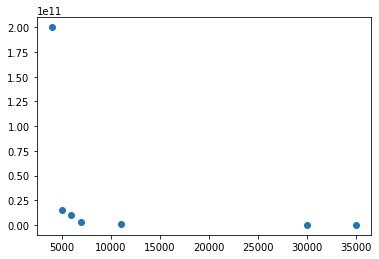

In [ ]:
mil = 10**3
milhao = 10**6
real_x = np.array([35, 30, 11, 7, 6, 5, 4])*mil
real_y = np.array([3, 15, 500, 3*mil, 10*mil, 15*mil, 200*mil])*milhao
plt.scatter(real_x,real_y)
plt.show()

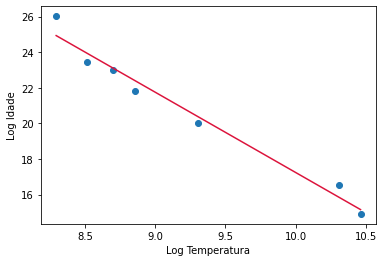

In [ ]:
fit = np.polyfit(np.log(real_x), np.log(real_y), 1)
def get_predicted_y(x):
  return np.e**np.polyval(fit, np.log(x))
range_x = np.linspace(np.min(real_x), np.max(real_x),50)
log_range_x = np.log(range_x)
log_predicted_y = np.array([np.polyval(fit,i) for i in log_range_x])
plt.scatter(np.log(real_x), np.log(real_y))
plt.plot(log_range_x, log_predicted_y, color='crimson')
plt.xlabel('Log Temperatura')
plt.ylabel('Log Idade')
plt.show()

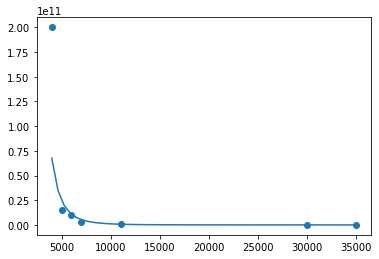

In [ ]:
predicted_y= np.array([get_predicted_y(i) for i in range_x])
plt.plot(range_x, predicted_y)
plt.scatter(real_x, real_y)
plt.show()

In [ ]:
print(f'A = {fit[0]}')
print(f'B = {fit[1]}')

A = -4.507444056783837
B = 62.319674921983506


In [ ]:
def print_age(cluster, age):
  print(f'Idade de {cluster} é {age} milhões de anos')
  
print_age(OMEGA_CENTAURI, int(get_predicted_y(8951.037)/milhao))
print_age(PLEIADES, int(get_predicted_y(11743.77)/milhao))

Idade de Omega Centauri é 1787 milhões de anos
Idade de Plêiades é 525 milhões de anos
